# E-commerce Fraud Detection Analysis

In [1]:
#Load libraries
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sb
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import glob
import pickle

%matplotlib inline

## Load data

In [2]:
#Load train y data
y = pd.read_pickle("train_y.pkl")


In [3]:
#Load train x data
X = pd.read_pickle("XGBoost_LR_train_X_2.pkl")

# Replace Nan with 0:
X = X.replace(-999, 0)

In [4]:
X=X[:40000]
y=y[:40000]

In [5]:
y.shape, X.shape

((40000,), (40000, 1303))

## Feature Selection

151


/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [20 22 28 30 31 32 33 34 35 36 39 40 46 47 51 52 57] are constant.
  UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


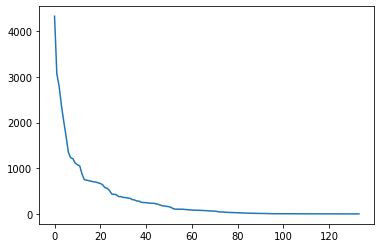

In [6]:
#SELECTION

#NUMERIC

from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import f_classif   #ANOVA
from sklearn.feature_selection import SelectKBest





#NUMERIC VALUES
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
X1_numeric = X.select_dtypes(include=numerics)    #selecting numeric columns for now

print(len(X1_numeric.columns))



bestfeatures = SelectKBest(score_func=f_classif, k=150)
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(X1_numeric), columns=X1_numeric.columns)
fit = bestfeatures.fit(df_scaled,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(df_scaled.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

featureScores=featureScores.sort_values(by='Score', ascending=False).reset_index()

featureScores.to_csv(r'numeric_features.csv')



import matplotlib. pyplot as plt

plt.plot(featureScores['Score'])

In [7]:
#Numeric features to keep

num_keep=list(featureScores['Specs'].iloc[:60])
print(num_keep)


['V201', 'V44', 'V87', 'V257', 'V171', 'V47', 'card3', 'V40', 'card3_FE', 'V198', 'addr2', 'cents', 'V228', 'V80', 'V78', 'V82', 'V41', 'V62', 'V17', 'TransactionAmt_card1_mean', 'V37', 'D11_card1_std', 'id_17', 'TransactionAmt_card1_std', 'addr1', 'V20', 'V59', 'D11_card1_addr1_std', 'addr1_FE', 'V56', 'V185', 'V291', 'id_01', 'TransactionAmt_card1_addr1_mean', 'V303', 'V258', 'TransactionAmt_card1_addr1_std', 'V147', 'V238', 'card2_FE', 'V165', 'V160', 'C1', 'P_emaildomain_FE', 'C13', 'D9_card1_addr1_P_emaildomain_std', 'V252', 'V166', 'TransactionAmt_card1_addr1_P_emaildomain_mean', 'D11_card1_addr1_P_emaildomain_std', 'V307', 'V169', 'V142', 'card2', 'V220', 'TransactionAmt_card1_addr1_P_emaildomain_std', 'id_02', 'D9_card1_addr1_std', 'V235', 'D11_card1_addr1_mean']


1152


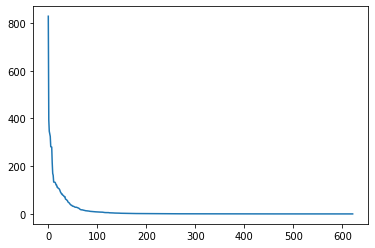

In [8]:
#SELECTION

#Categorical

from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import chi2  #Chi sq
from sklearn.feature_selection import SelectKBest





#Categorical VALUES
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
X1_categorical = X.select_dtypes(exclude=numerics)    #selecting numeric columns for now

print(len(X1_categorical.columns))



bestfeatures = SelectKBest(score_func=chi2, k=200)
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(X1_categorical), columns=X1_categorical.columns)
fit = bestfeatures.fit(df_scaled,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(df_scaled.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

featureScores=featureScores.sort_values(by='Score', ascending=False).reset_index()

featureScores.to_csv(r'categorical_features.csv')




import matplotlib. pyplot as plt

plt.plot(featureScores['Score'])


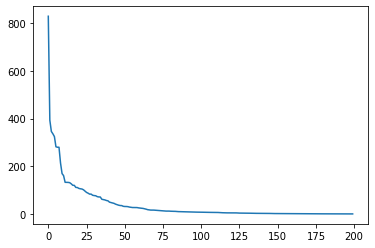

In [9]:
plt.plot(featureScores['Score'].iloc[:200])



In [10]:
cat_keep=list(featureScores['Specs'].iloc[:50])
print(cat_keep)

['M4_M2', 'DeviceInfo_huawei', 'id_31_opera', 'R_emaildomain_gmail.com', 'id_34_match_status:2', 'id_35_T', 'DeviceInfo_nokia', 'DeviceInfo_z835 build/nmf26v', 'ProductCD_R', 'id_33_1920x1080', 'P_emaildomain_gmail.com', 'R_emaildomain_anonymous.com', 'DeviceInfo_f5121 build/34.3.a.0.238', 'DeviceType_mobile', 'id_30_Windows 10', 'R_emaildomain_hotmail.com', 'id_16_NotFound', 'DeviceInfo_macos', 'DeviceInfo_5049w build/nrd90m', 'id_33_855x480', 'P_emaildomain_anonymous.com', 'id_30_Windows 7', 'id_15_New', 'ProductCD_H', 'id_31_ie', 'DeviceInfo_kffowi build/lvy48f', 'DeviceInfo_vs425pp build/lmy47v', 'DeviceInfo_zte-z835', 'DeviceInfo_xt1033', 'DeviceInfo_trident/7.0', 'P_emaildomain_hotmail.com', 'P_emaildomain_outlook.com', 'id_15_Unknown', 'card4_mastercard', 'DeviceInfo_xt1563 build/mpds24.107-52-5', 'R_emaildomain_outlook.com', 'DeviceInfo_ta', 'id_29_NotFound', 'P_emaildomain_yahoo.com', 'DeviceInfo_zeia8', 'id_38_T', 'id_28_New', 'id_33_1440x900', 'id_33_1024x600', 'id_31_chrome

In [11]:
#Final Set of columns:
print(type(cat_keep))
print(type(num_keep))
keep=num_keep+cat_keep
print(len(keep))

<class 'list'>
<class 'list'>
110


In [12]:
X_final=X[keep]

In [13]:
print(X_final.head())
with open("X_select.pkl", "wb") as f:
    pickle.dump(X_final, f)

   V201  V44  V87  V257  V171  V47  card3  V40  card3_FE  V198  ...  id_38_T  \
0   1.0  0.0  0.0   1.0   1.0  0.0  150.0  0.0  0.875699   1.0  ...        1   
1   1.0  0.0  0.0   1.0   1.0  0.0  150.0  0.0  0.875699   1.0  ...        1   
2   1.0  1.0  1.0   1.0   4.0  2.0  117.0  1.0  0.002600   1.0  ...        1   
3   1.0  1.0  1.0   1.0   1.0  1.0  185.0  1.0  0.100635   1.0  ...        1   
4   1.0  0.0  0.0   1.0   1.0  0.0  150.0  0.0  0.875699   1.0  ...        1   

   id_28_New  id_33_1440x900  id_33_1024x600  id_31_chrome  id_33_1600x900  \
0          1               0               0             0               0   
1          1               0               0             0               0   
2          0               0               0             1               0   
3          1               0               0             1               0   
4          0               0               0             1               0   

   DeviceInfo_moto  id_30_iOS 11.2.0  DeviceInfo_z

## Random Undersampling non-fraud data

In [14]:
#Load libraties
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler # doctest: +NORMALIZE_WHITESPACE


In [15]:
#To use the libary "imblearn", we need to convert dataframe to numpy format
def random_undersample_nonfraud(X,y,ratio=1, randomState = None):
    #INPUT:
        #X [dataframe]: data feature matrix (mxn) where m is no. of data points and n is no. of features
        #y [data series]: response vector (mx1)
        #ratio [float]: ratio of fraud to non-fraud after resampling. Ratio = 1 means no. fraud = no. non-fraud
    #OUTPUT:
        #X_random_res [dataframe]
        #y_random_res [data series]
        
    X_arr, y_arr = X.to_numpy(), y.to_numpy()

    #Before balancing
    print('Original dataset shape %s' % Counter(y))

    #Undersampling without replacement
    rus = RandomUnderSampler(sampling_strategy = ratio, random_state = randomState)
    X_random_res, y_random_res = rus.fit_resample(X_arr, y_arr)
    print('Resampled dataset shape %s' % Counter(y_random_res))
    
    #In order to use sklearn model, we need input to be in dataframe format. Convert balanced numpy data to dataframe:
    X_random_res = pd.DataFrame(data = X_random_res, columns = X.columns)
    y_random_res = pd.Series(data = y_random_res).rename(y.name)
    
    return X_random_res, y_random_res

In [16]:
#Implementation
X_random_res, y_random_res = random_undersample_nonfraud(X_final,y,ratio=1)

Original dataset shape Counter({0: 38621, 1: 1379})
Resampled dataset shape Counter({0: 1379, 1: 1379})


## Cluster based Undersampling- Uma

In [77]:
pip install https://github.com/scikit-learn-contrib/scikit-learn-extra/archive/master.zip


  Using cached https://github.com/scikit-learn-contrib/scikit-learn-extra/archive/master.zip
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for scikit-learn-extra: filename=scikit_learn_extra-0.1.0b2-cp37-cp37m-macosx_10_9_x86_64.whl size=119353 sha256=d1411b55dcd7fd6d497abccd6ad728a7dbbfa723d1a9c8a291d42a138cc9f809
  Stored in directory: /private/var/folders/b4/rpyp51bj3qq52nxc3s50j60r0000gn/T/pip-ephem-wheel-cache-g64qaab1/wheels/04/6b/35/4a74a73584fd88d74cd8843ce90ac1dd164d7267060953536f
Successfully built scikit-learn-extra
Note: you may need to restart the kernel to use updated packages.


In [18]:
#KMEANS
# from sklearn.cluster import KMeans
# def cluster_undersampling(X,n_clus):

#     kmeans = KMeans(n_clusters=n_clus, random_state=0).fit(X)
#     new_X=kmeans.cluster_centers_
    
#     return new_X
    
    
    

In [17]:
#KMEDIODS
from sklearn_extra.cluster import KMedoids

def cluster_undersampling(X,n_clus):

    kmed = KMedoids(n_clusters=n_clus, random_state=0).fit(X)
    new_X=kmed.cluster_centers_
    
    return new_X
    
  

In [18]:

X_clus_original=X_final.iloc[y[y==0]]
n_clus=len(y[y==1])

In [19]:
X_after_clus= cluster_undersampling(X_clus_original,n_clus)

/opt/anaconda3/lib/python3.7/site-packages/sklearn_extra/cluster/_k_medoids.py:234: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  "its corresponding cluster ({k}).".format(k=k)
/opt/anaconda3/lib/python3.7/site-packages/sklearn_extra/cluster/_k_medoids.py:234: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  "its corresponding cluster ({k}).".format(k=k)
/opt/anaconda3/lib/python3.7/site-packages/sklearn_extra/cluster/_k_medoids.py:234: UserWarning: Cluster 3 is empty! self.labels_[self.medoid_indices_[3]] may not be labeled with its corresponding cluster (3).
  "its corresponding cluster ({k}).".format(k=k)
/opt/anaconda3/lib/python3.7/site-packages/sklearn_extra/cluster/_k_medoids.py:234: UserWarning: Cluster 4 is empty! self.labels_[self.medoid_indices_[4]] may not be labeled with its corresponding cluster (4).
  "its corres

In [20]:

X_after_clus_df=pd.DataFrame(X_after_clus,columns=X_final.iloc[y[y==0]].columns)
X_clus=pd.concat([X_after_clus_df,X_final.iloc[y[y==1]]])
y_clus=pd.concat([pd.Series(np.zeros(n_clus)), pd.Series(np.ones(n_clus))])


In [21]:
# y_clus.name='isFraud'
# X_clus.reset_index(drop=True, inplace=True)
# y_clus.reset_index(drop=True, inplace=True)
# print((X_clus.head()))
# print((y_clus.head()))
# data1=pd.concat([X_clus,y_clus],axis=1,ignore_index=True)


In [22]:
# data1 = data1.sample(frac=1).reset_index(drop=True)
# X_clus=data1.iloc[:,:85]
# y_clus=data1.iloc[:,:-1]

## LR with random undersampling 

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.preprocessing import StandardScaler

In [45]:

x_train1, x_test1, y_train1, y_test1 = train_test_split(X_random_res, y_random_res, random_state=4,test_size=0.25)

In [46]:
lr1 = LogisticRegression(max_iter=40000)
lr1.fit(x_train1,y_train1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=40000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

              precision    recall  f1-score   support

           0       0.73      0.81      0.77       335
           1       0.80      0.72      0.76       355

    accuracy                           0.76       690
   macro avg       0.77      0.76      0.76       690
weighted avg       0.77      0.76      0.76       690



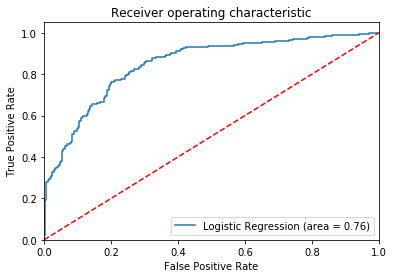

In [49]:
y_pred1 = lr1.predict(x_test1)
accuracy1 = metrics.accuracy_score(y_test1, y_pred1)

#print(y_pred1)


#confusion_matrix1 = confusion_matrix(y_test1, y_pred1)
#print('Confusion Matrix: \n',confusion_matrix1)

print(classification_report(y_test1, y_pred1))

logit_roc_auc = roc_auc_score(y_test1, lr1.predict(x_test1))
fpr, tpr, thresholds = roc_curve(y_test1, lr1.predict_proba(x_test1)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()



## LR with clustered sampling

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [51]:
print(y_clus.head())
print(y_clus.tail())

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
dtype: float64
1374    1.0
1375    1.0
1376    1.0
1377    1.0
1378    1.0
dtype: float64


In [53]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(X_clus, y_clus, random_state=4, test_size=0.25)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       335
         1.0       1.00      1.00      1.00       355

    accuracy                           1.00       690
   macro avg       1.00      1.00      1.00       690
weighted avg       1.00      1.00      1.00       690



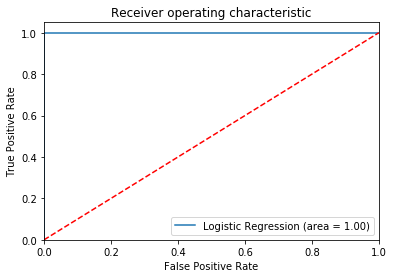

In [54]:
lr2 = LogisticRegression(max_iter=40000)
lr2.fit(x_train2,y_train2)
y_pred2 = lr2.predict(x_test2)
accuracy2 = metrics.accuracy_score(y_test2, y_pred2)


#confusion_matrix = confusion_matrix(y_test2, y_pred2)
#print('Confusion Matrix: \n',confusion_matrix)

print(classification_report(y_test2, y_pred2))

logit_roc_auc = roc_auc_score(y_test2, lr2.predict(x_test2))
fpr, tpr, thresholds = roc_curve(y_test2, lr2.predict_proba(x_test2)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()